<a href="https://colab.research.google.com/github/Sedkameni/IntroAI_Willis/blob/main/Sedrick_assignment9_IAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

"""
Customer Personality Analysis: Clustering & Dimensionality Reduction
Dataset: Customer Personality Analysis Dataset - Kaggle


This notebook demonstrates:
- Data loading and comprehensive EDA
- Feature engineering and preprocessing
- K-Means and Hierarchical Clustering
- PCA and t-SNE dimensionality reduction
- Model evaluation and customer profiling
"""


'\nCustomer Personality Analysis: Clustering & Dimensionality Reduction\nDataset: Customer Personality Analysis Dataset - Kaggle\n\n\nThis notebook demonstrates:\n- Data loading and comprehensive EDA\n- Feature engineering and preprocessing\n- K-Means and Hierarchical Clustering\n- PCA and t-SNE dimensionality reduction\n- Model evaluation and customer profiling\n'

In [8]:
# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")
# ============================================================================
# 1. IMPORT LIBRARIES
# ============================================================================

All libraries imported successfully!


In [6]:
# ============================================================================
# 2. DATASET LOADING & INITIAL CHECKS
# ============================================================================

print("\n" + "="*80)
print("DATASET LOADING & INITIAL CHECKS")
print("="*80)

try:
    # Load the dataset
    df = pd.read_excel('marketing_campaign.xlsx')

    print(f"\nDataset Shape: {df.shape}")
    print(f"Number of Customers: {len(df)}")
    print("\nFirst 5 rows:")
    print(df.head())

except FileNotFoundError:
    print("Error: 'marketing_campaign.xlsx' not found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")


DATASET LOADING & INITIAL CHECKS

Dataset Shape: (2240, 29)
Number of Customers: 2240

First 5 rows:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5   

In [9]:
# ============================================================================
# 3. EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# Dataset info
print("\nDataset Information:")
print(df.info())

# Statistical summary
print("\nStatistical Summary:")
print(df.describe())

# Check missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")

# Unique values for categorical columns
categorical_cols = ['Education', 'Marital_Status']
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].unique()}")

# Income distribution analysis
if 'Income' in df.columns:
    print(f"\nIncome Statistics:")
    print(f"Mean Income: ${df['Income'].mean():,.2f}")
    print(f"Median Income: ${df['Income'].median():,.2f}")
    print(f"Income Range: ${df['Income'].min():,.2f} - ${df['Income'].max():,.2f}")

# Age calculation
if 'Year_Birth' in df.columns:
    current_year = 2025
    df['Age'] = current_year - df['Year_Birth']
    print(f"\nAge Statistics:")
    print(f"Mean Age: {df['Age'].mean():.1f} years")
    print(f"Age Range: {df['Age'].min()} - {df['Age'].max()} years")

# Customer enrollment duration
if 'Dt_Customer' in df.columns:
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
    df['Customer_Days'] = (pd.to_datetime('2025-11-08') - df['Dt_Customer']).dt.days
    print(f"\nCustomer Tenure (days): Mean = {df['Customer_Days'].mean():.0f}")



EXPLORATORY DATA ANALYSIS

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   in


DATA VISUALIZATION

 Total_Spending feature created
 Total_Purchases feature created
Total_Campaigns_Accepted feature created
 Total_Children feature created


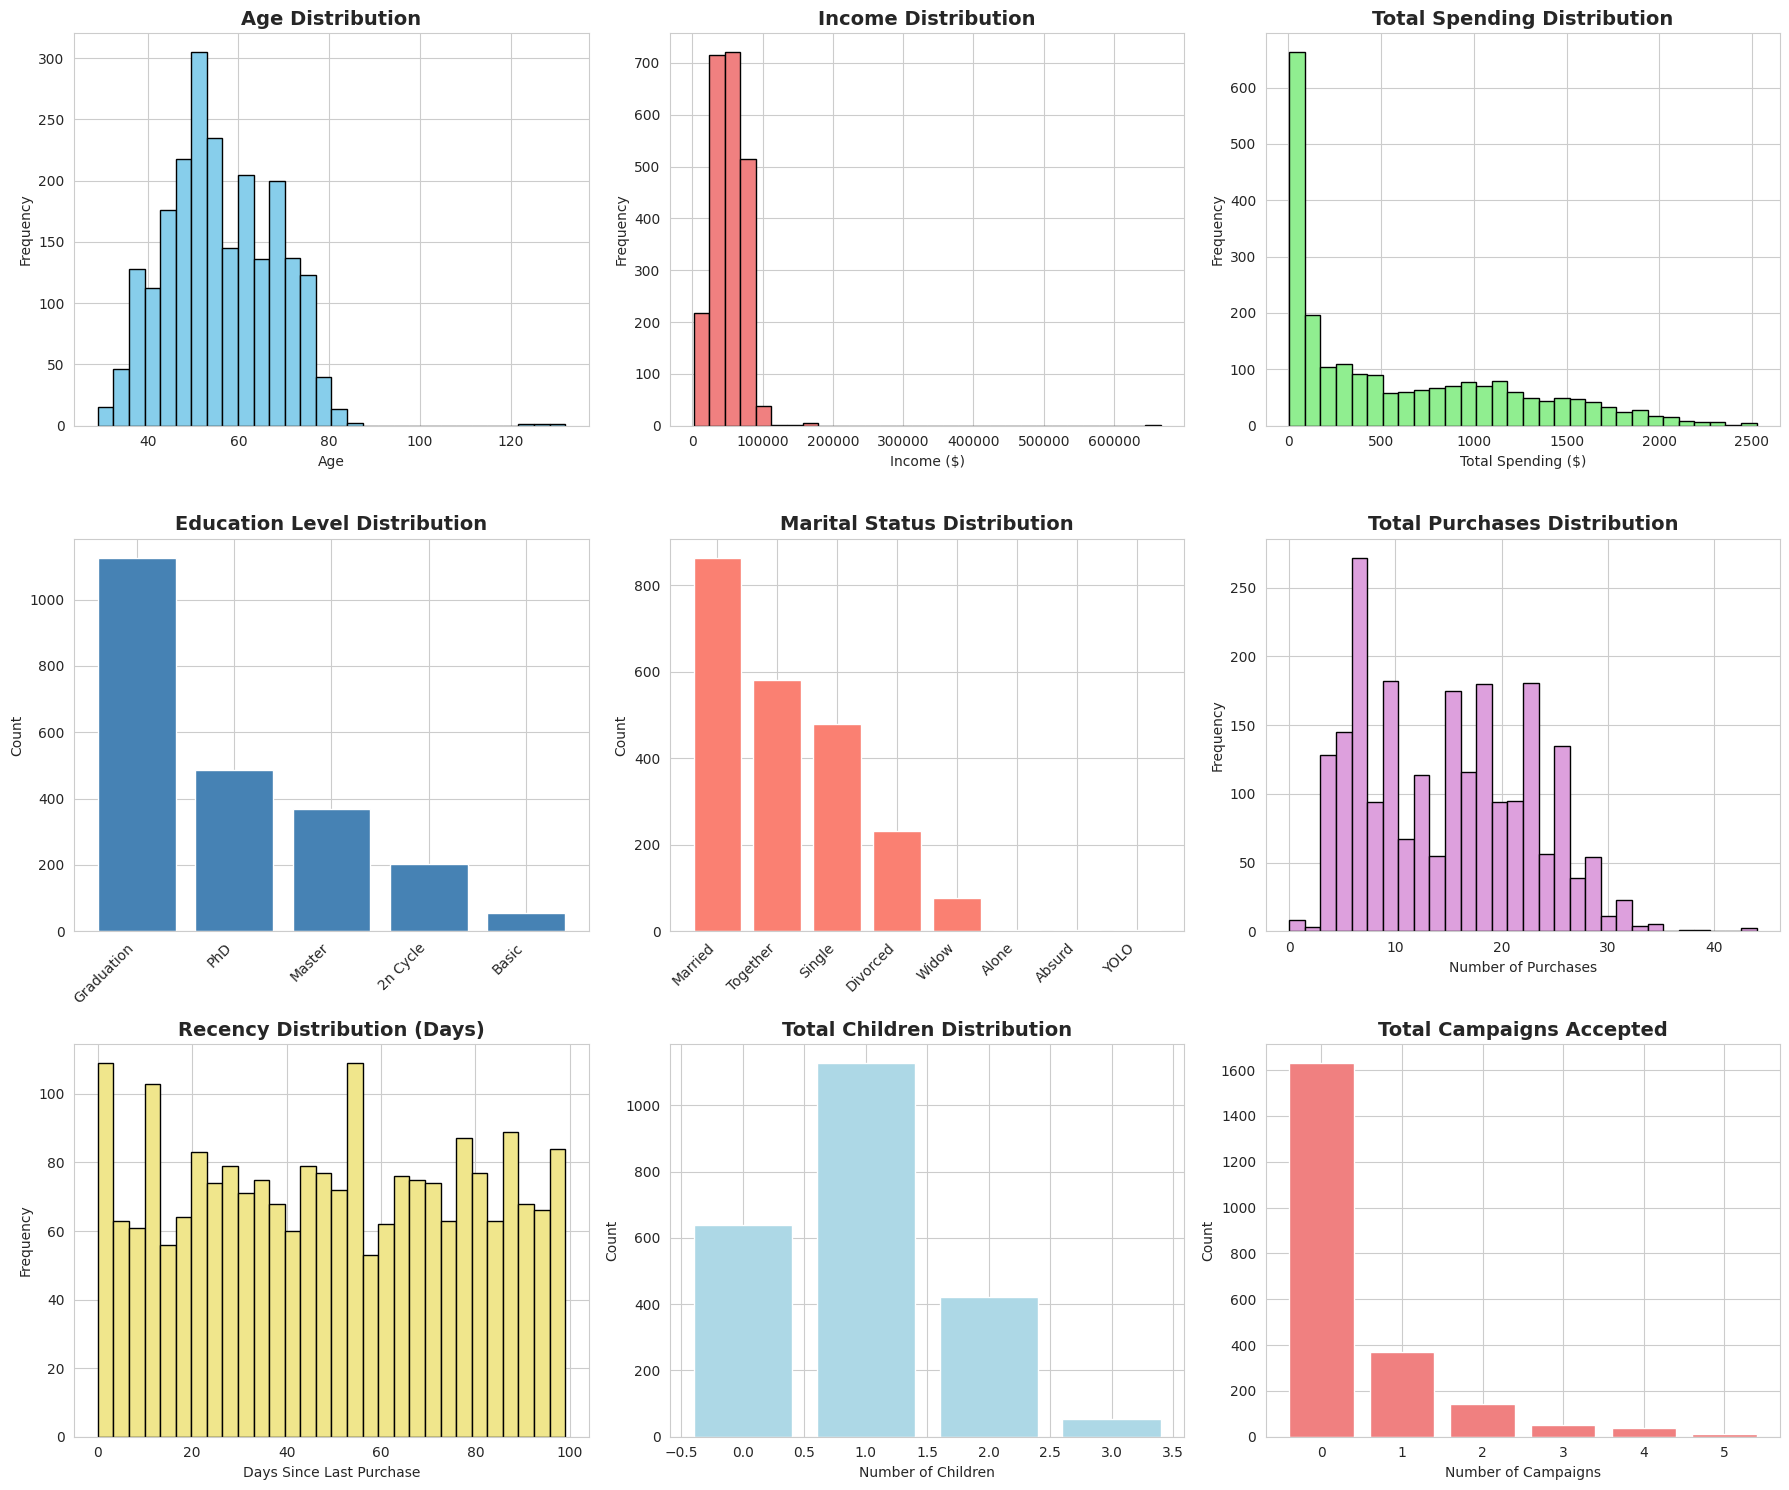

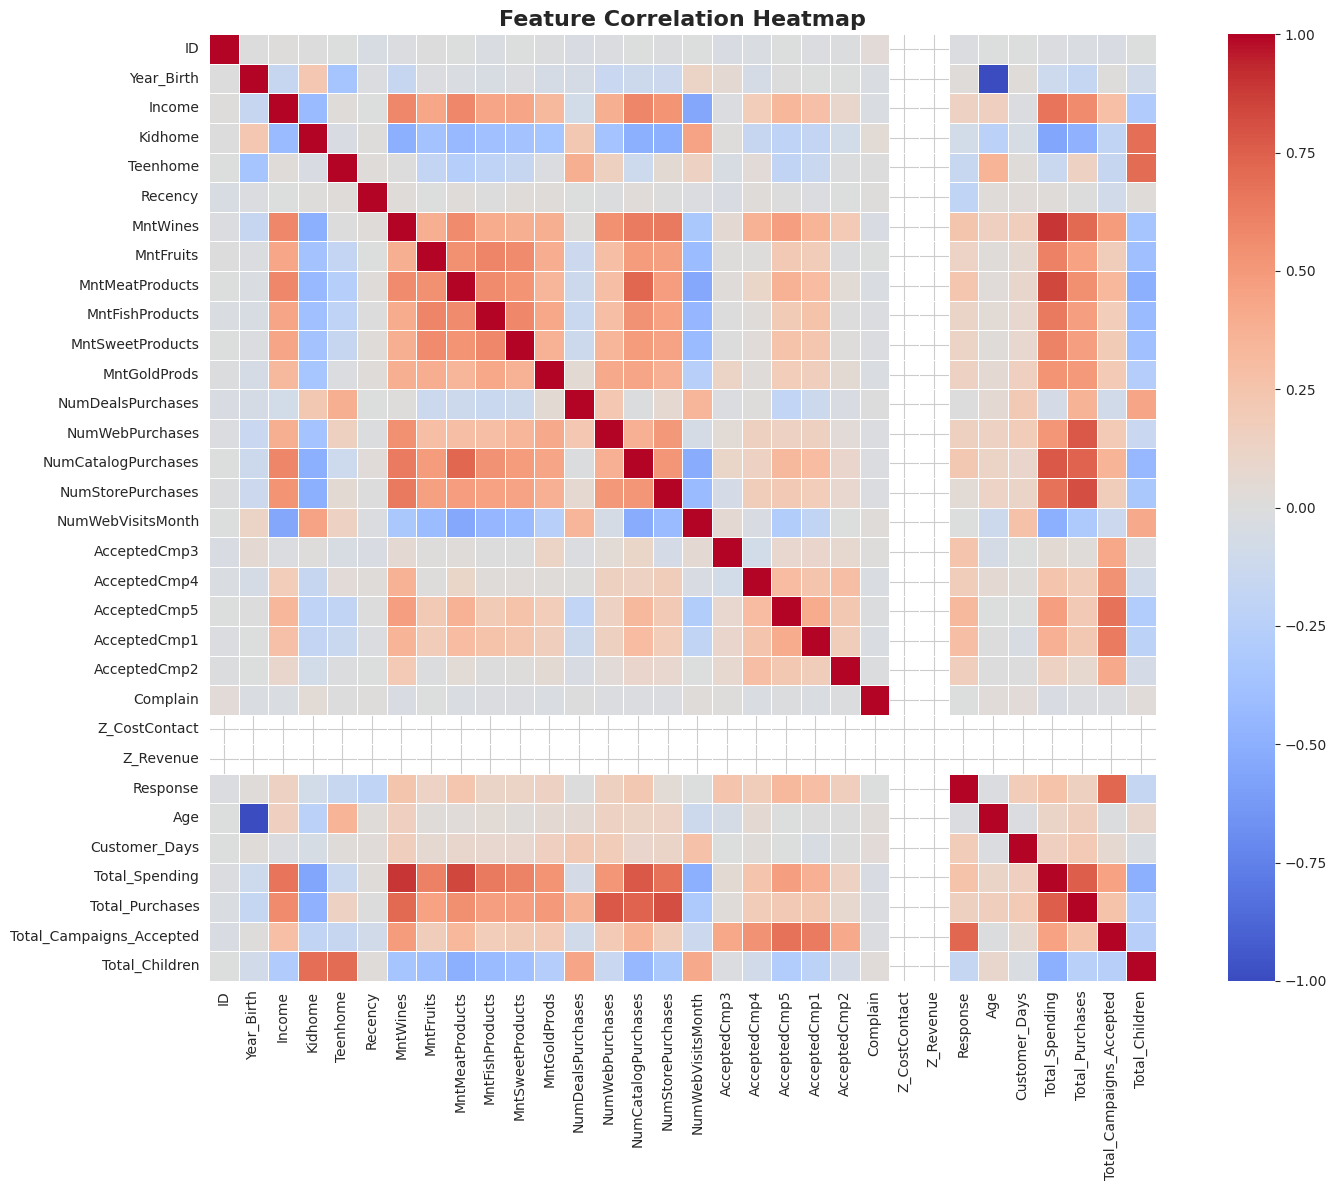

In [12]:
# ============================================================================
# 4. DATA VISUALIZATION - INITIAL EXPLORATION
# ============================================================================

print("\n" + "="*80)
print("DATA VISUALIZATION")
print("="*80)

# Create spending columns total
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts',
                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
if all(col in df.columns for col in spending_cols):
    df['Total_Spending'] = df[spending_cols].sum(axis=1)
    print(f"\n Total_Spending feature created")

# Create total purchases
purchase_cols = ['NumDealsPurchases', 'NumWebPurchases',
                 'NumCatalogPurchases', 'NumStorePurchases']
if all(col in df.columns for col in purchase_cols):
    df['Total_Purchases'] = df[purchase_cols].sum(axis=1)
    print(f" Total_Purchases feature created")

# Create total campaigns accepted
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
if all(col in df.columns for col in campaign_cols):
    df['Total_Campaigns_Accepted'] = df[campaign_cols].sum(axis=1)
    print(f"Total_Campaigns_Accepted feature created")

# Total children
if 'Kidhome' in df.columns and 'Teenhome' in df.columns:
    df['Total_Children'] = df['Kidhome'] + df['Teenhome']
    print(f" Total_Children feature created")

# Visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Age distribution
if 'Age' in df.columns:
    axes[0, 0].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
    axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Age')
    axes[0, 0].set_ylabel('Frequency')

# Income distribution
if 'Income' in df.columns:
    axes[0, 1].hist(df['Income'].dropna(), bins=30, color='lightcoral', edgecolor='black')
    axes[0, 1].set_title('Income Distribution', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Income ($)')
    axes[0, 1].set_ylabel('Frequency')

# Total Spending
if 'Total_Spending' in df.columns:
    axes[0, 2].hist(df['Total_Spending'], bins=30, color='lightgreen', edgecolor='black')
    axes[0, 2].set_title('Total Spending Distribution', fontsize=14, fontweight='bold')
    axes[0, 2].set_xlabel('Total Spending ($)')
    axes[0, 2].set_ylabel('Frequency')

# Education distribution
if 'Education' in df.columns:
    education_counts = df['Education'].value_counts()
    axes[1, 0].bar(range(len(education_counts)), education_counts.values, color='steelblue')
    axes[1, 0].set_xticks(range(len(education_counts)))
    axes[1, 0].set_xticklabels(education_counts.index, rotation=45, ha='right')
    axes[1, 0].set_title('Education Level Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylabel('Count')

# Marital Status distribution
if 'Marital_Status' in df.columns:
    marital_counts = df['Marital_Status'].value_counts()
    axes[1, 1].bar(range(len(marital_counts)), marital_counts.values, color='salmon')
    axes[1, 1].set_xticks(range(len(marital_counts)))
    axes[1, 1].set_xticklabels(marital_counts.index, rotation=45, ha='right')
    axes[1, 1].set_title('Marital Status Distribution', fontsize=14, fontweight='bold')
    axes[1, 1].set_ylabel('Count')

# Total Purchases
if 'Total_Purchases' in df.columns:
    axes[1, 2].hist(df['Total_Purchases'], bins=30, color='plum', edgecolor='black')
    axes[1, 2].set_title('Total Purchases Distribution', fontsize=14, fontweight='bold')
    axes[1, 2].set_xlabel('Number of Purchases')
    axes[1, 2].set_ylabel('Frequency')

# Recency
if 'Recency' in df.columns:
    axes[2, 0].hist(df['Recency'], bins=30, color='khaki', edgecolor='black')
    axes[2, 0].set_title('Recency Distribution (Days)', fontsize=14, fontweight='bold')
    axes[2, 0].set_xlabel('Days Since Last Purchase')
    axes[2, 0].set_ylabel('Frequency')

# Total Children
if 'Total_Children' in df.columns:
    children_counts = df['Total_Children'].value_counts().sort_index()
    axes[2, 1].bar(children_counts.index, children_counts.values, color='lightblue')
    axes[2, 1].set_title('Total Children Distribution', fontsize=14, fontweight='bold')
    axes[2, 1].set_xlabel('Number of Children')
    axes[2, 1].set_ylabel('Count')

# Campaigns Accepted
if 'Total_Campaigns_Accepted' in df.columns:
    campaign_counts = df['Total_Campaigns_Accepted'].value_counts().sort_index()
    axes[2, 2].bar(campaign_counts.index, campaign_counts.values, color='lightcoral')
    axes[2, 2].set_title('Total Campaigns Accepted', fontsize=14, fontweight='bold')
    axes[2, 2].set_xlabel('Number of Campaigns')
    axes[2, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [13]:
#============================================================================
# 5. DATA PREPROCESSING
# ============================================================================

print("\n" + "="*80)
print("DATA PREPROCESSING")
print("="*80)

# Create a copy for preprocessing
df_processed = df.copy()

# Handle missing values in Income
if 'Income' in df_processed.columns:
    income_missing = df_processed['Income'].isnull().sum()
    print(f"\nMissing Income values: {income_missing}")
    if income_missing > 0:
        df_processed['Income'].fillna(df_processed['Income'].median(), inplace=True)
        print(f" Filled missing Income with median: ${df_processed['Income'].median():,.2f}")

# Remove outliers from Age (unrealistic values)
if 'Age' in df_processed.columns:
    age_before = len(df_processed)
    df_processed = df_processed[(df_processed['Age'] >= 18) & (df_processed['Age'] <= 100)]
    print(f"\n Removed {age_before - len(df_processed)} rows with unrealistic Age values")

# Remove outliers from Income (extreme values)
if 'Income' in df_processed.columns:
    Q1 = df_processed['Income'].quantile(0.01)
    Q3 = df_processed['Income'].quantile(0.99)
    income_before = len(df_processed)
    df_processed = df_processed[(df_processed['Income'] >= Q1) & (df_processed['Income'] <= Q3)]
    print(f" Removed {income_before - len(df_processed)} rows with extreme Income values")

# Encode Education
if 'Education' in df_processed.columns:
    education_mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2,
                        'Master': 3, 'PhD': 4}
    df_processed['Education_Encoded'] = df_processed['Education'].map(education_mapping)
    # If any unmapped values, use label encoder
    if df_processed['Education_Encoded'].isnull().any():
        le_edu = LabelEncoder()
        df_processed['Education_Encoded'] = le_edu.fit_transform(df_processed['Education'])
    print(f"\n Education encoded")

# Encode Marital Status
if 'Marital_Status' in df_processed.columns:
    # Simplify marital status into broader categories
    marital_mapping = {
        'Married': 1, 'Together': 1,
        'Single': 0, 'Divorced': 0, 'Widow': 0,
        'Alone': 0, 'Absurd': 0, 'YOLO': 0
    }
    df_processed['Is_Partnered'] = df_processed['Marital_Status'].map(
        lambda x: marital_mapping.get(x, 0) if isinstance(x, str) else 0
    )
    print(f" Marital Status encoded (Is_Partnered)")

# Select features for clustering
feature_list = [
    'Age', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases',
    'Total_Children', 'Total_Campaigns_Accepted', 'NumWebVisitsMonth',
    'Education_Encoded', 'Is_Partnered'
]

# Filter to only existing features
available_features = [f for f in feature_list if f in df_processed.columns]
print(f"\nFeatures selected for clustering: {available_features}")

X = df_processed[available_features].values
print(f"Feature matrix shape: {X.shape}")

# Check for any remaining NaN values
if np.isnan(X).any():
    print(f"\n Warning: {np.isnan(X).sum()} NaN values detected. Filling with column means...")
    for i in range(X.shape[1]):
        col_mean = np.nanmean(X[:, i])
        X[np.isnan(X[:, i]), i] = col_mean

# Feature Scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\n Data standardized using StandardScaler")
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Mean of scaled features: {X_scaled.mean(axis=0).round(4)}")
print(f"Std of scaled features: {X_scaled.std(axis=0).round(4)}")


DATA PREPROCESSING

Missing Income values: 24
 Filled missing Income with median: $51,381.50

 Removed 3 rows with unrealistic Age values
 Removed 46 rows with extreme Income values

 Education encoded
 Marital Status encoded (Is_Partnered)

Features selected for clustering: ['Age', 'Income', 'Recency', 'Total_Spending', 'Total_Purchases', 'Total_Children', 'Total_Campaigns_Accepted', 'NumWebVisitsMonth', 'Education_Encoded', 'Is_Partnered']
Feature matrix shape: (2191, 10)

 Data standardized using StandardScaler
Scaled data shape: (2191, 10)
Mean of scaled features: [-0. -0.  0. -0.  0.  0.  0. -0. -0.  0.]
Std of scaled features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



CLUSTERING ANALYSIS

--- K-MEANS CLUSTERING ---

Calculating optimal K...
  K=2: Inertia=16151.59, Silhouette=0.2411
  K=3: Inertia=14634.52, Silhouette=0.1658
  K=4: Inertia=13543.49, Silhouette=0.1461
  K=5: Inertia=12579.73, Silhouette=0.1526
  K=6: Inertia=11870.90, Silhouette=0.1361
  K=7: Inertia=11301.38, Silhouette=0.1444
  K=8: Inertia=10878.82, Silhouette=0.1381
  K=9: Inertia=10508.88, Silhouette=0.1347
  K=10: Inertia=10174.87, Silhouette=0.1350


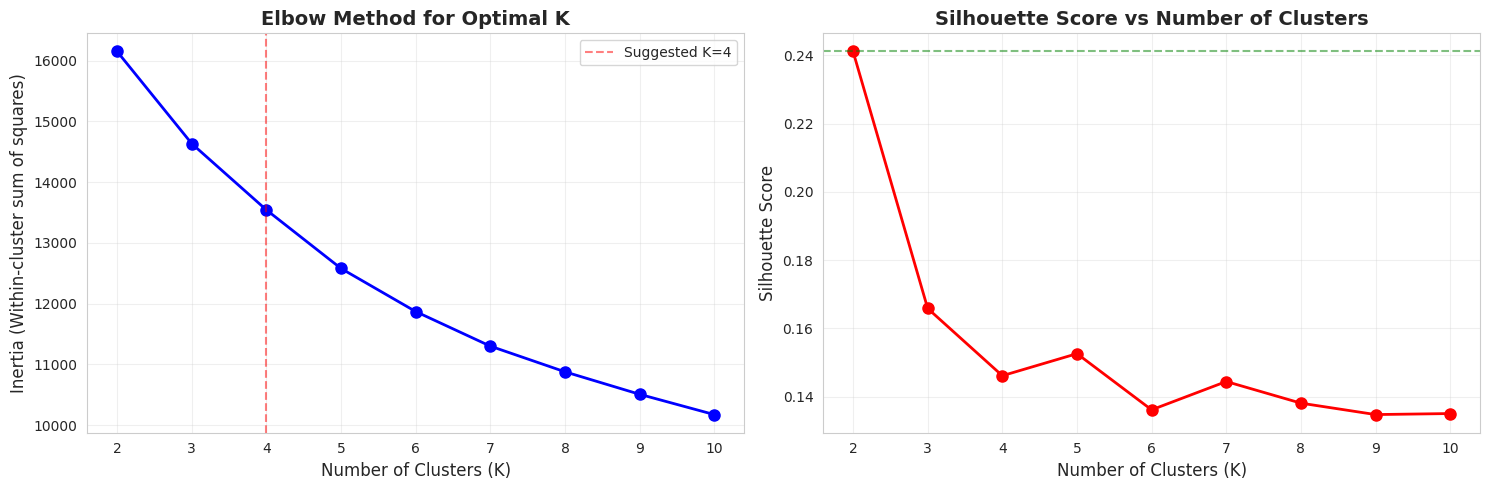


Optimal number of clusters (K-Means): 2
  Silhouette Score at optimal K: 0.2411

K-Means Cluster Distribution:
  Cluster 0: 1240 customers (56.6%)
  Cluster 1: 951 customers (43.4%)

--- HIERARCHICAL CLUSTERING ---


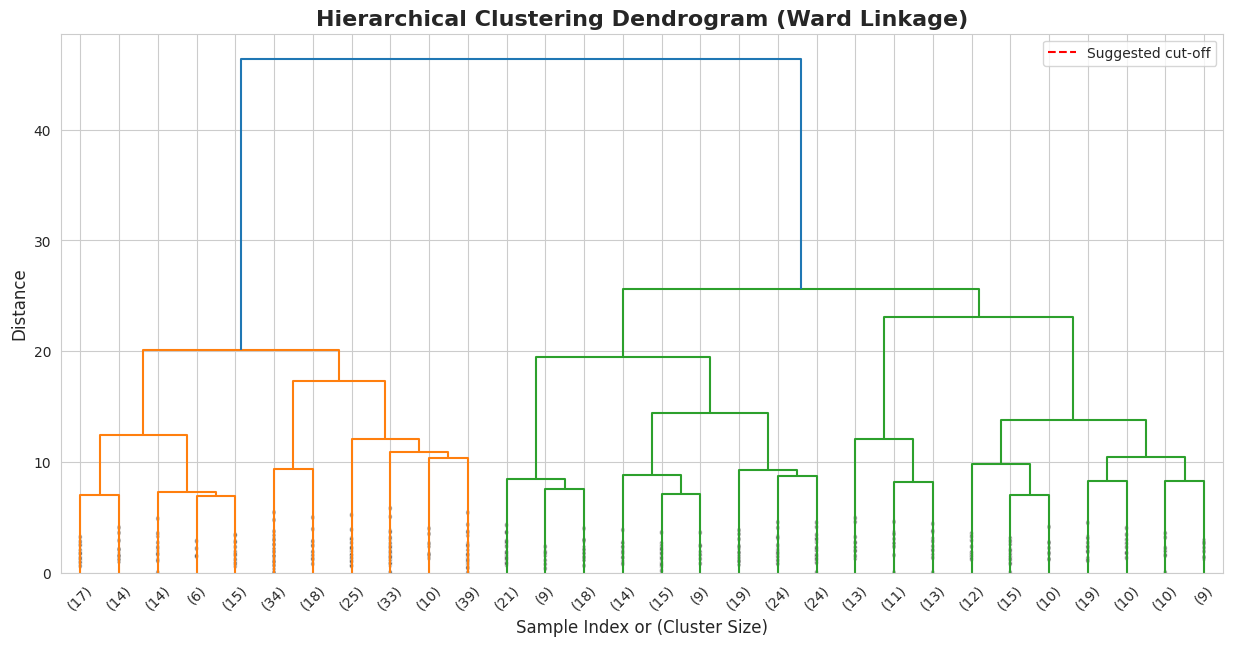


Calculating optimal K for Hierarchical Clustering...
  K=2: Silhouette=0.2091
  K=3: Silhouette=0.1449
  K=4: Silhouette=0.1197
  K=5: Silhouette=0.1232
  K=6: Silhouette=0.1048
  K=7: Silhouette=0.1097
  K=8: Silhouette=0.1090
  K=9: Silhouette=0.1059
  K=10: Silhouette=0.1060

 Optimal number of clusters (Hierarchical): 2
  Silhouette Score at optimal K: 0.2091

Hierarchical Cluster Distribution:
  Cluster 0: 1071 customers (48.9%)
  Cluster 1: 1120 customers (51.1%)


In [14]:
# ============================================================================
# 6. CLUSTERING ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("CLUSTERING ANALYSIS")
print("="*80)

# -----------------------------
# 6.1 K-MEANS CLUSTERING
# -----------------------------

print("\n--- K-MEANS CLUSTERING ---")

# Elbow Method and Silhouette Analysis
inertias = []
silhouette_scores = []
K_range = range(2, 11)

print("\nCalculating optimal K...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    print(f"  K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette={silhouette_scores[-1]:.4f}")

# Plot Elbow Curve and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[0].set_ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
axes[0].set_title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(x=4, color='r', linestyle='--', alpha=0.5, label='Suggested K=4')
axes[0].legend()

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs Number of Clusters', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=max(silhouette_scores), color='g', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Select optimal K
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters (K-Means): {optimal_k}")
print(f"  Silhouette Score at optimal K: {max(silhouette_scores):.4f}")

# Fit K-Means with optimal K
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_processed['KMeans_Cluster'] = kmeans_labels

print(f"\nK-Means Cluster Distribution:")
cluster_dist = df_processed['KMeans_Cluster'].value_counts().sort_index()
for cluster_id, count in cluster_dist.items():
    print(f"  Cluster {cluster_id}: {count} customers ({count/len(df_processed)*100:.1f}%)")

# -----------------------------
# 6.2 HIERARCHICAL CLUSTERING
# -----------------------------

print("\n--- HIERARCHICAL CLUSTERING ---")

# For large datasets, sample for dendrogram visualization
sample_size = min(500, len(X_scaled))
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]

# Create linkage matrix
linkage_matrix = linkage(X_sample, method='ward')

# Plot Dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30,
           leaf_font_size=10, show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram (Ward Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=50, color='r', linestyle='--', label='Suggested cut-off')
plt.legend()
plt.show()

# Determine optimal clusters for Hierarchical Clustering
silhouette_scores_hc = []
print("\nCalculating optimal K for Hierarchical Clustering...")
for k in K_range:
    hc = AgglomerativeClustering(n_clusters=k, linkage='ward')
    hc_labels = hc.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, hc_labels)
    silhouette_scores_hc.append(sil_score)
    print(f"  K={k}: Silhouette={sil_score:.4f}")

optimal_k_hc = K_range[np.argmax(silhouette_scores_hc)]
print(f"\n Optimal number of clusters (Hierarchical): {optimal_k_hc}")
print(f"  Silhouette Score at optimal K: {max(silhouette_scores_hc):.4f}")

# Fit Hierarchical Clustering with optimal K
hc_final = AgglomerativeClustering(n_clusters=optimal_k_hc, linkage='ward')
hc_labels = hc_final.fit_predict(X_scaled)

# Add cluster labels to dataframe
df_processed['Hierarchical_Cluster'] = hc_labels

print(f"\nHierarchical Cluster Distribution:")
hc_cluster_dist = df_processed['Hierarchical_Cluster'].value_counts().sort_index()
for cluster_id, count in hc_cluster_dist.items():
    print(f"  Cluster {cluster_id}: {count} customers ({count/len(df_processed)*100:.1f}%)")


DIMENSIONALITY REDUCTION

--- PRINCIPAL COMPONENT ANALYSIS (PCA) ---

 PCA (2 components) completed
Explained variance ratio: [0.34126532 0.12778131]
Total variance explained: 0.4690

 PCA (3 components) completed
Explained variance ratio: [0.34126532 0.12778131 0.10721955]
Total variance explained: 0.5763


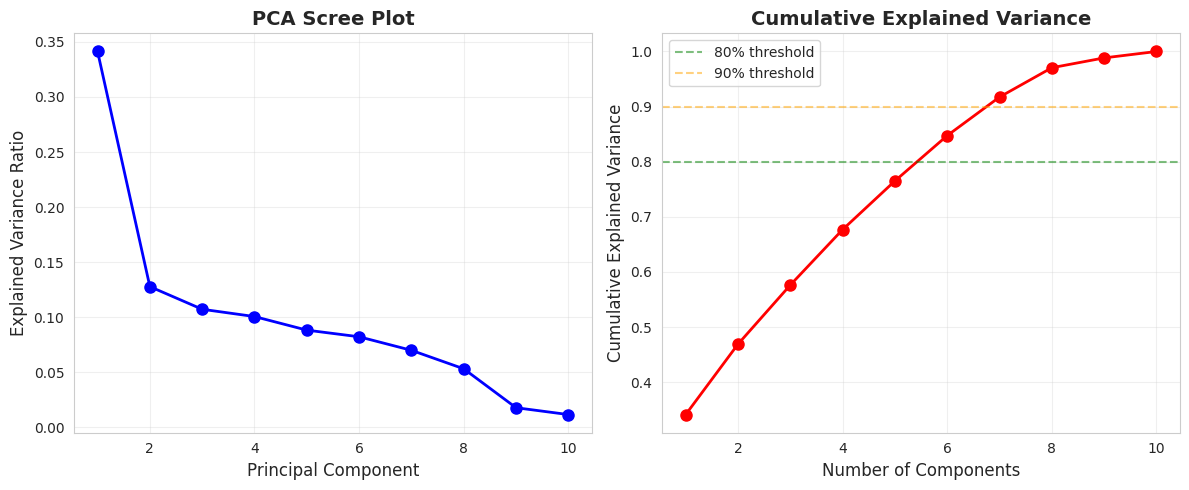

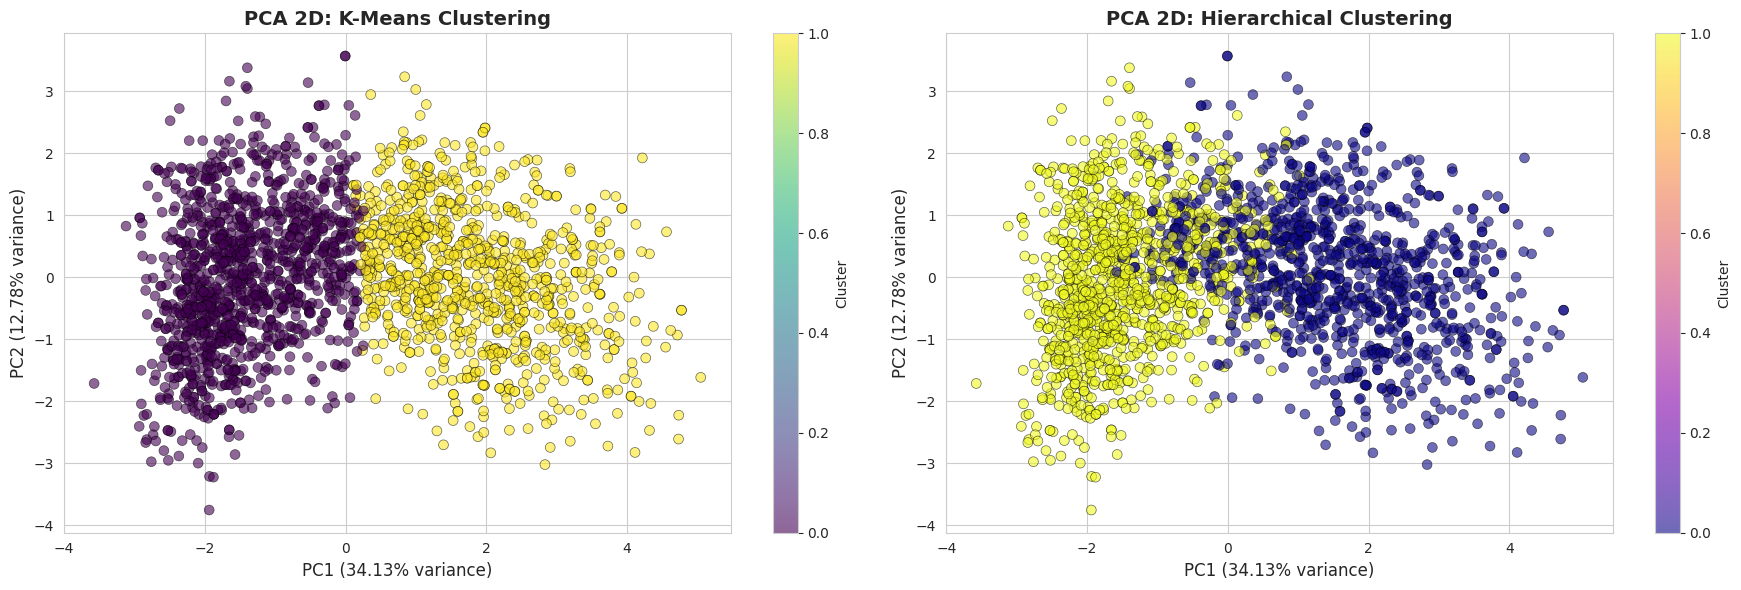

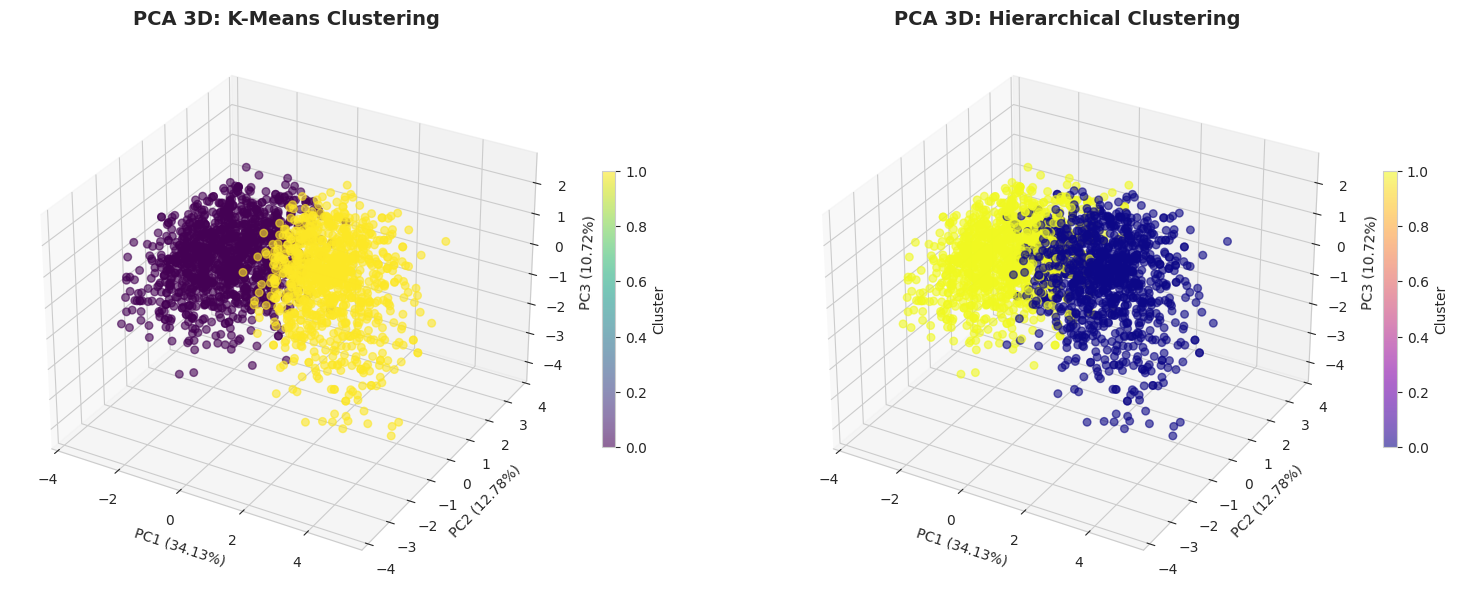


--- t-SNE (t-Distributed Stochastic Neighbor Embedding) ---
Computing t-SNE embeddings (this may take 1-2 minutes)...

 t-SNE completed


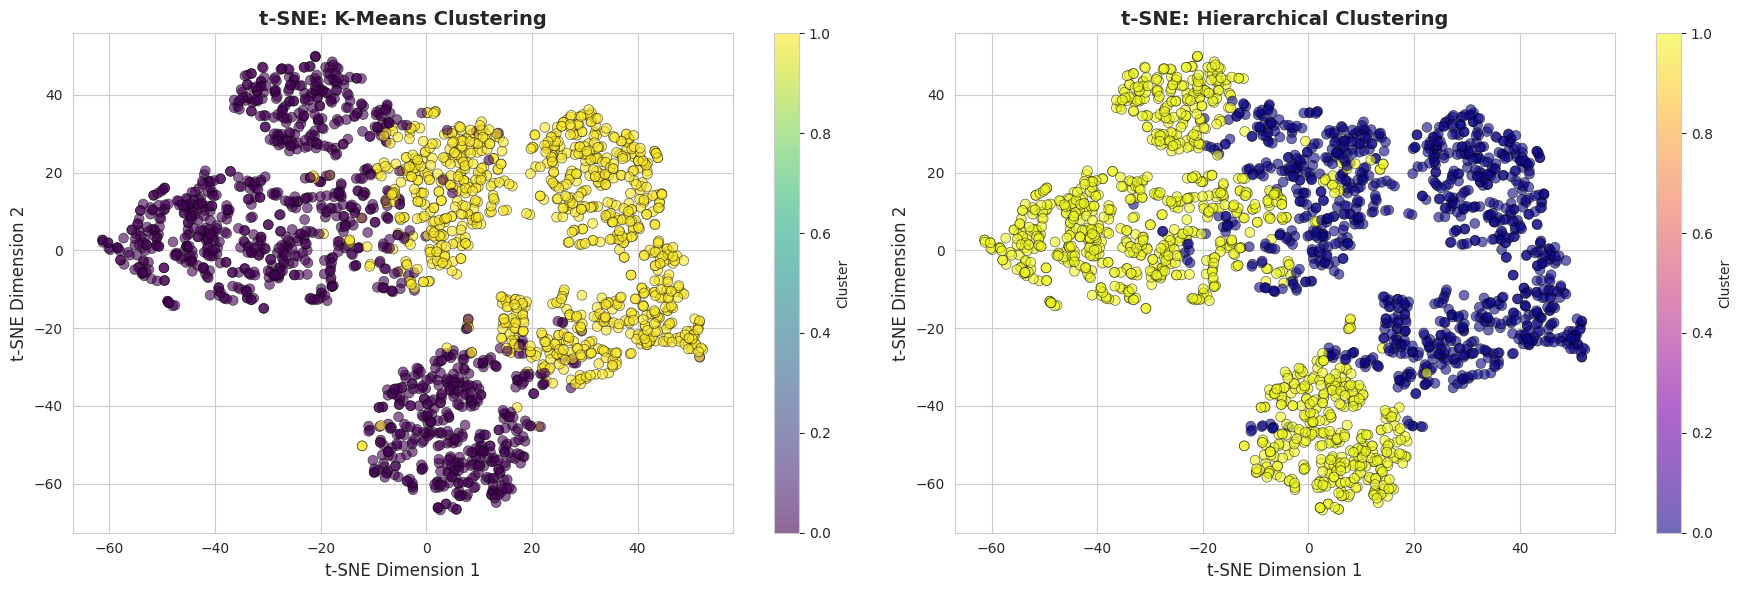

In [15]:
# ============================================================================
# 7. DIMENSIONALITY REDUCTION
# ============================================================================

print("\n" + "="*80)
print("DIMENSIONALITY REDUCTION")
print("="*80)

# -----------------------------
# 7.1 PRINCIPAL COMPONENT ANALYSIS (PCA)
# -----------------------------

print("\n--- PRINCIPAL COMPONENT ANALYSIS (PCA) ---")

# Apply PCA for 2D visualization
pca_2d = PCA(n_components=2, random_state=42)
X_pca_2d = pca_2d.fit_transform(X_scaled)

print(f"\n PCA (2 components) completed")
print(f"Explained variance ratio: {pca_2d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_2d.explained_variance_ratio_.sum():.4f}")

# Apply PCA for 3D visualization
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_scaled)

print(f"\n PCA (3 components) completed")
print(f"Explained variance ratio: {pca_3d.explained_variance_ratio_}")
print(f"Total variance explained: {pca_3d.explained_variance_ratio_.sum():.4f}")

# Scree plot
pca_full = PCA(random_state=42)
pca_full.fit(X_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1),
         pca_full.explained_variance_ratio_, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('PCA Scree Plot', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
cumsum = np.cumsum(pca_full.explained_variance_ratio_)
plt.plot(range(1, len(cumsum)+1), cumsum, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
plt.axhline(y=0.8, color='g', linestyle='--', alpha=0.5, label='80% threshold')
plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.5, label='90% threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Visualize PCA 2D with clusters
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# PCA with K-Means clusters
scatter1 = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels,
                          cmap='viridis', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[0].set_title('PCA 2D: K-Means Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# PCA with Hierarchical clusters
scatter2 = axes[1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=hc_labels,
                          cmap='plasma', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)', fontsize=12)
axes[1].set_title('PCA 2D: Hierarchical Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()

# 3D PCA Visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 6))

# 3D PCA with K-Means
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=kmeans_labels, cmap='viridis', s=30, alpha=0.6)
ax1.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax1.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax1.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax1.set_title('PCA 3D: K-Means Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter1, ax=ax1, label='Cluster', shrink=0.5)

# 3D PCA with Hierarchical
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                       c=hc_labels, cmap='plasma', s=30, alpha=0.6)
ax2.set_xlabel(f'PC1 ({pca_3d.explained_variance_ratio_[0]:.2%})', fontsize=10)
ax2.set_ylabel(f'PC2 ({pca_3d.explained_variance_ratio_[1]:.2%})', fontsize=10)
ax2.set_zlabel(f'PC3 ({pca_3d.explained_variance_ratio_[2]:.2%})', fontsize=10)
ax2.set_title('PCA 3D: Hierarchical Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter2, ax=ax2, label='Cluster', shrink=0.5)

plt.tight_layout()
plt.show()

# -----------------------------
# 7.2 t-SNE
# -----------------------------

print("\n--- t-SNE (t-Distributed Stochastic Neighbor Embedding) ---")

# Apply t-SNE (this may take a while for large datasets)
print("Computing t-SNE embeddings (this may take 1-2 minutes)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, verbose=0)
X_tsne = tsne.fit_transform(X_scaled)

print(f"\n t-SNE completed")

# Visualize t-SNE with clusters
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# t-SNE with K-Means clusters
scatter3 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                          cmap='viridis', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('t-SNE Dimension 1', fontsize=12)
axes[0].set_ylabel('t-SNE Dimension 2', fontsize=12)
axes[0].set_title('t-SNE: K-Means Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter3, ax=axes[0], label='Cluster')

# t-SNE with Hierarchical clusters
scatter4 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hc_labels,
                          cmap='plasma', s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
axes[1].set_xlabel('t-SNE Dimension 1', fontsize=12)
axes[1].set_ylabel('t-SNE Dimension 2', fontsize=12)
axes[1].set_title('t-SNE: Hierarchical Clustering', fontsize=14, fontweight='bold')
plt.colorbar(scatter4, ax=axes[1], label='Cluster')

plt.tight_layout()
plt.show()



MODEL EVALUATION

--- K-MEANS CLUSTERING METRICS ---
Silhouette Score: 0.2411 (Range: -1 to 1, higher is better)
Davies-Bouldin Index: 1.6252 (Lower is better)
Calinski-Harabasz Score: 780.4289 (Higher is better)

--- HIERARCHICAL CLUSTERING METRICS ---
Silhouette Score: 0.2091 (Range: -1 to 1, higher is better)
Davies-Bouldin Index: 1.7516 (Lower is better)
Calinski-Harabasz Score: 672.0359 (Higher is better)

--- COMPARISON TABLE ---
                   Metric    K-Means  Hierarchical Best Model
       Silhouette Score ↑   0.241107      0.209126    K-Means
   Davies-Bouldin Index ↓   1.625193      1.751632    K-Means
Calinski-Harabasz Score ↑ 780.428937    672.035870    K-Means

 BEST PERFORMING MODEL: K-Means Clustering
  K-Means wins on Silhouette Score: 0.2411 vs 0.2091


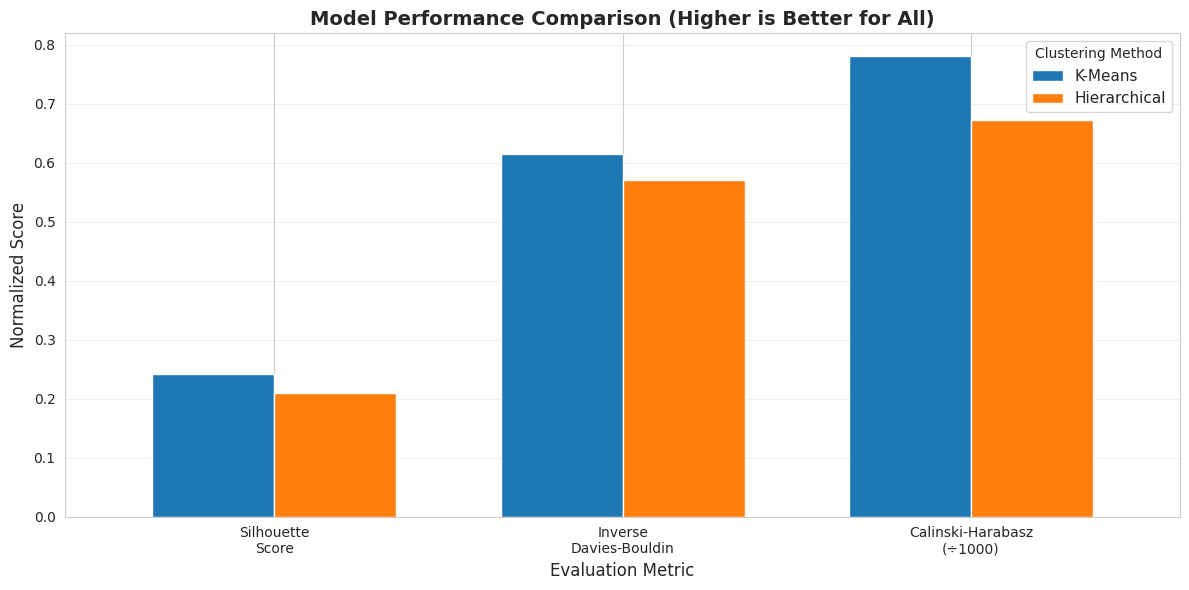

In [17]:
# ============================================================================
# 8. MODEL EVALUATION
# ============================================================================

print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

# Evaluation metrics for K-Means
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_davies_bouldin = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)

print("\n--- K-MEANS CLUSTERING METRICS ---")
print(f"Silhouette Score: {kmeans_silhouette:.4f} (Range: -1 to 1, higher is better)")
print(f"Davies-Bouldin Index: {kmeans_davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Score: {kmeans_calinski:.4f} (Higher is better)")

# Evaluation metrics for Hierarchical Clustering
hc_silhouette = silhouette_score(X_scaled, hc_labels)
hc_davies_bouldin = davies_bouldin_score(X_scaled, hc_labels)
hc_calinski = calinski_harabasz_score(X_scaled, hc_labels)

print("\n--- HIERARCHICAL CLUSTERING METRICS ---")
print(f"Silhouette Score: {hc_silhouette:.4f} (Range: -1 to 1, higher is better)")
print(f"Davies-Bouldin Index: {hc_davies_bouldin:.4f} (Lower is better)")
print(f"Calinski-Harabasz Score: {hc_calinski:.4f} (Higher is better)")

# Comparison table
comparison_df = pd.DataFrame({
    'Metric': ['Silhouette Score ↑', 'Davies-Bouldin Index ↓', 'Calinski-Harabasz Score ↑'],
    'K-Means': [kmeans_silhouette, kmeans_davies_bouldin, kmeans_calinski],
    'Hierarchical': [hc_silhouette, hc_davies_bouldin, hc_calinski],
    'Best Model': [
        'K-Means' if kmeans_silhouette > hc_silhouette else 'Hierarchical',
        'K-Means' if kmeans_davies_bouldin < hc_davies_bouldin else 'Hierarchical',
        'K-Means' if kmeans_calinski > hc_calinski else 'Hierarchical'
    ]
})

print("\n--- COMPARISON TABLE ---")
print(comparison_df.to_string(index=False))

# Determine best model
if kmeans_silhouette > hc_silhouette:
    best_model = "K-Means"
    print(f"\n BEST PERFORMING MODEL: K-Means Clustering")
    print(f"  K-Means wins on Silhouette Score: {kmeans_silhouette:.4f} vs {hc_silhouette:.4f}")
else:
    best_model = "Hierarchical"
    print(f"\n BEST PERFORMING MODEL: Hierarchical Clustering")
    print(f"  Hierarchical wins on Silhouette Score: {hc_silhouette:.4f} vs {kmeans_silhouette:.4f}")

# Visualization of metrics comparison
metrics_comparison = pd.DataFrame({
    'K-Means': [kmeans_silhouette, 1/kmeans_davies_bouldin, kmeans_calinski/1000],
    'Hierarchical': [hc_silhouette, 1/hc_davies_bouldin, hc_calinski/1000]
}, index=['Silhouette\nScore', 'Inverse\nDavies-Bouldin', 'Calinski-Harabasz\n(÷1000)'])

metrics_comparison.plot(kind='bar', figsize=(12, 6), rot=0, width=0.7)
plt.title('Model Performance Comparison (Higher is Better for All)', fontsize=14, fontweight='bold')
plt.ylabel('Normalized Score', fontsize=12)
plt.xlabel('Evaluation Metric', fontsize=12)
plt.legend(title='Clustering Method', fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


CLUSTER PROFILING (K-MEANS)

Detailed Cluster Characteristics:

CLUSTER 0 (n=1240 customers, 56.6%)
  Age                      :      54.42
  Income                   :   37707.85
  Total_Spending           :     166.89
  Total_Purchases          :       9.84
  Recency                  :      48.83
  Total_Children           :       1.27
  Total_Campaigns_Accepted :       0.19
  NumWebVisitsMonth        :       6.46
  Most Common Education    : Graduation
  Most Common Marital Status:    Married

CLUSTER 1 (n=951 customers, 43.4%)
  Age                      :      58.52
  Income                   :   70106.34
  Total_Spending           :    1173.80
  Total_Purchases          :      21.42
  Recency                  :      49.68
  Total_Children           :       0.55
  Total_Campaigns_Accepted :       0.75
  NumWebVisitsMonth        :       3.79
  Most Common Education    : Graduation
  Most Common Marital Status:    Married


Cluster Profile Summary Table:
                  Age    Inc

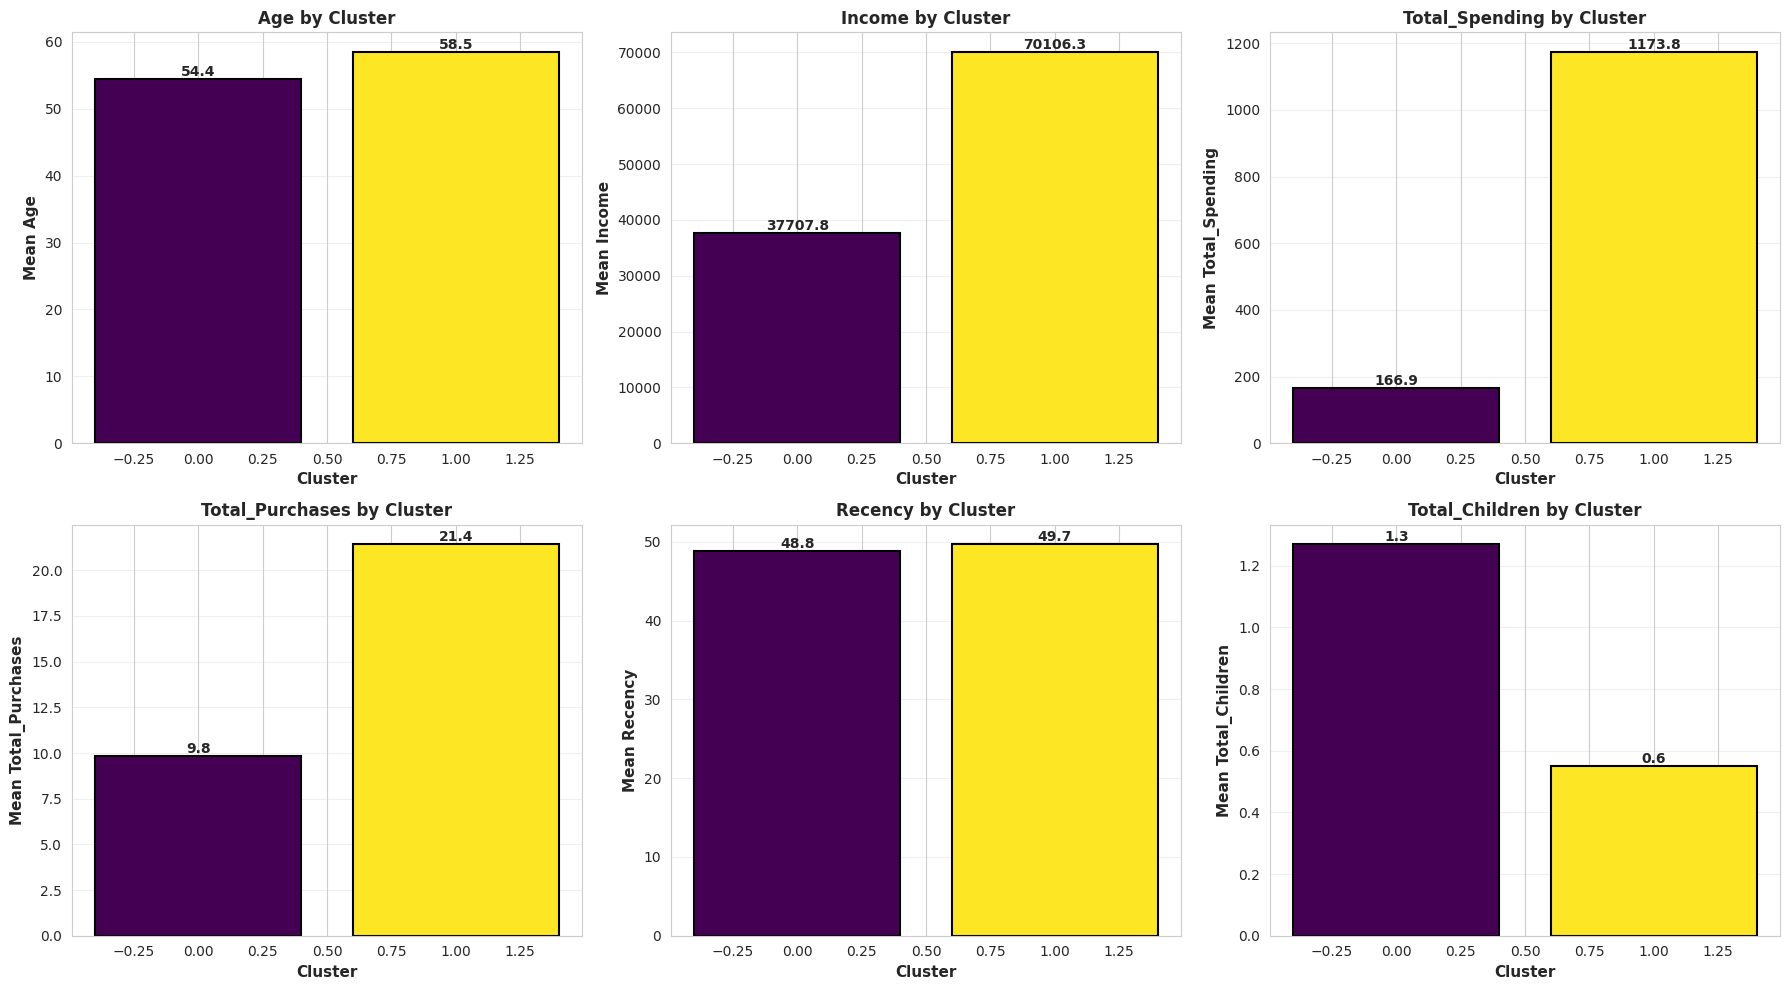

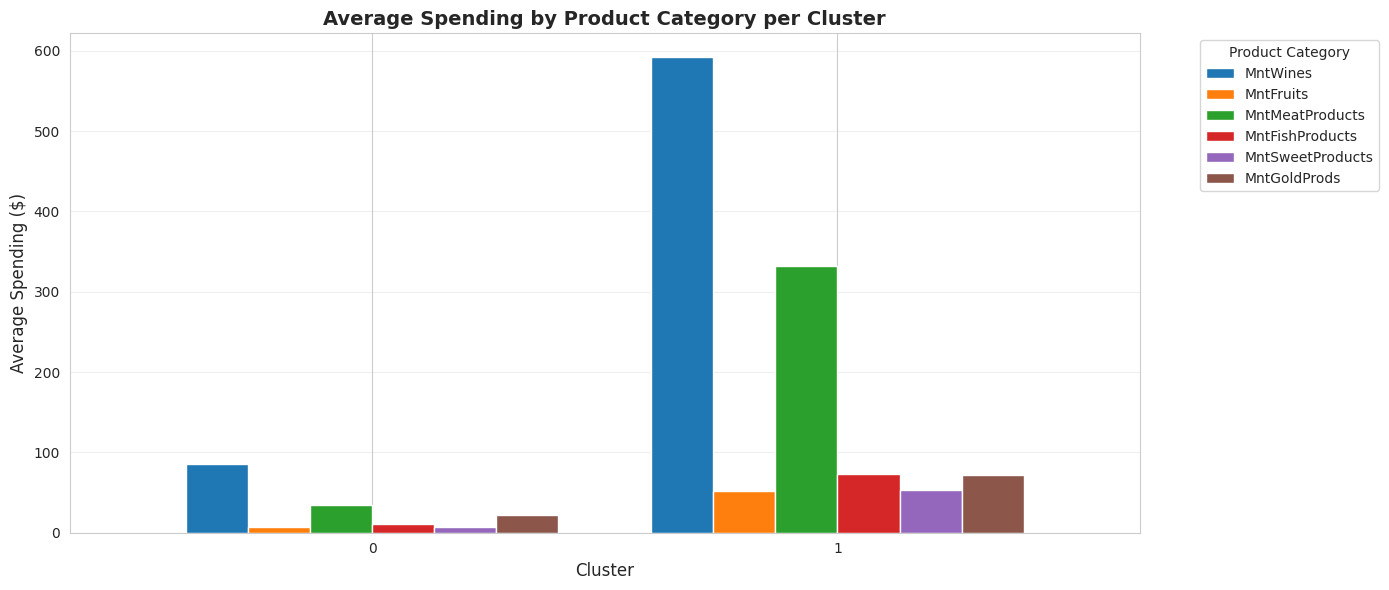

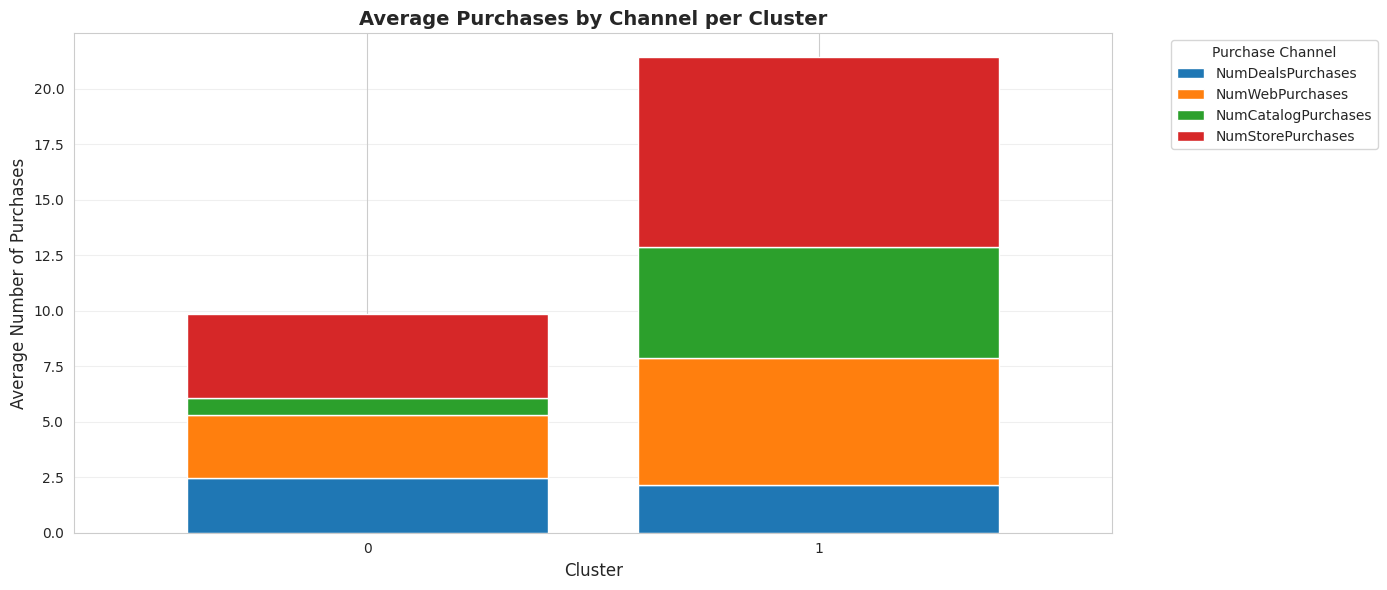

In [18]:
# ============================================================================
# 9. CLUSTER PROFILING
# ============================================================================

print("\n" + "="*80)
print("CLUSTER PROFILING (K-MEANS)")
print("="*80)

# Create comprehensive cluster profile
profile_features = [f for f in ['Age', 'Income', 'Total_Spending', 'Total_Purchases',
                                'Recency', 'Total_Children', 'Total_Campaigns_Accepted',
                                'NumWebVisitsMonth'] if f in df_processed.columns]

print("\nDetailed Cluster Characteristics:")
for cluster_id in sorted(df_processed['KMeans_Cluster'].unique()):
    cluster_data = df_processed[df_processed['KMeans_Cluster'] == cluster_id]
    print(f"\n{'='*60}")
    print(f"CLUSTER {cluster_id} (n={len(cluster_data)} customers, {len(cluster_data)/len(df_processed)*100:.1f}%)")
    print(f"{'='*60}")

    for feature in profile_features:
        mean_val = cluster_data[feature].mean()
        print(f"  {feature:25s}: {mean_val:>10.2f}")

    # Most common education level
    if 'Education' in cluster_data.columns:
        most_common_edu = cluster_data['Education'].mode()[0] if len(cluster_data['Education'].mode()) > 0 else 'N/A'
        print(f"  {'Most Common Education':25s}: {most_common_edu:>10s}")

    # Most common marital status
    if 'Marital_Status' in cluster_data.columns:
        most_common_marital = cluster_data['Marital_Status'].mode()[0] if len(cluster_data['Marital_Status'].mode()) > 0 else 'N/A'
        print(f"  {'Most Common Marital Status':25s}: {most_common_marital:>10s}")

# Aggregate cluster profile for visualization
cluster_profile = df_processed.groupby('KMeans_Cluster')[profile_features].mean().round(2)
print("\n\nCluster Profile Summary Table:")
print(cluster_profile)

# Visualize cluster profiles
n_features = min(6, len(profile_features))
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feature in enumerate(profile_features[:n_features]):
    cluster_means = df_processed.groupby('KMeans_Cluster')[feature].mean()
    colors = plt.cm.viridis(np.linspace(0, 1, len(cluster_means)))

    axes[idx].bar(cluster_means.index, cluster_means.values, color=colors, edgecolor='black', linewidth=1.5)
    axes[idx].set_xlabel('Cluster', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(f'Mean {feature}', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{feature} by Cluster', fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(cluster_means.values):
        axes[idx].text(i, v, f'{v:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Spending breakdown by cluster
if all(col in df_processed.columns for col in spending_cols):
    spending_by_cluster = df_processed.groupby('KMeans_Cluster')[spending_cols].mean()

    spending_by_cluster.plot(kind='bar', figsize=(14, 6), width=0.8)
    plt.title('Average Spending by Product Category per Cluster', fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Average Spending ($)', fontsize=12)
    plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Purchase channel preferences by cluster
if all(col in df_processed.columns for col in purchase_cols):
    purchases_by_cluster = df_processed.groupby('KMeans_Cluster')[purchase_cols].mean()

    purchases_by_cluster.plot(kind='bar', figsize=(14, 6), width=0.8, stacked=True)
    plt.title('Average Purchases by Channel per Cluster', fontsize=14, fontweight='bold')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Average Number of Purchases', fontsize=12)
    plt.legend(title='Purchase Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()


In [20]:
# ============================================================================
# 10. CLUSTER INTERPRETATION & NAMING
# ============================================================================

print("\n" + "="*80)
print("CLUSTER INTERPRETATION & CUSTOMER PERSONAS")
print("="*80)

# Analyze and name clusters based on characteristics
cluster_personas = {}

for cluster_id in sorted(df_processed['KMeans_Cluster'].unique()):
    cluster_data = df_processed[df_processed['KMeans_Cluster'] == cluster_id]

    avg_income = cluster_data['Income'].mean() if 'Income' in cluster_data.columns else 0
    avg_spending = cluster_data['Total_Spending'].mean() if 'Total_Spending' in cluster_data.columns else 0
    avg_purchases = cluster_data['Total_Purchases'].mean() if 'Total_Purchases' in cluster_data.columns else 0
    avg_age = cluster_data['Age'].mean() if 'Age' in cluster_data.columns else 0
    avg_children = cluster_data['Total_Children'].mean() if 'Total_Children' in cluster_data.columns else 0

    # Determine persona based on characteristics
    if avg_spending > df_processed['Total_Spending'].quantile(0.75):
        if avg_income > df_processed['Income'].quantile(0.75):
            persona = " Premium Customers"
            description = "High-income, high-spending customers. Prime targets for premium products and exclusive offers."
        else:
            persona = " Enthusiastic Shoppers"
            description = "Moderate income but high spending propensity. Highly engaged with promotional campaigns."
    elif avg_spending < df_processed['Total_Spending'].quantile(0.25):
        persona = " Budget-Conscious"
        description = "Low spending despite reasonable income. Focus on value propositions and discounts."
    else:
        if avg_age > df_processed['Age'].quantile(0.60):
            persona = " Established Customers"
            description = "Mature, stable customers with moderate spending. Loyal but selective purchasers."
        else:
            persona = " Growing Potential"
            description = "Young to middle-aged with moderate engagement. High potential for growth."

    cluster_personas[cluster_id] = {
        'name': persona,
        'description': description,
        'size': len(cluster_data),
        'percentage': len(cluster_data) / len(df_processed) * 100
    }

    print(f"\nCluster {cluster_id}: {persona}")
    print(f"{'─'*60}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df_processed)*100:.1f}%)")
    print(f"Description: {description}")
    print(f"\nKey Metrics:")
    print(f"  • Average Age: {avg_age:.1f} years")
    print(f"  • Average Income: ${avg_income:,.2f}")
    print(f"  • Average Total Spending: ${avg_spending:,.2f}")
    print(f"  • Average Total Purchases: {avg_purchases:.1f}")
    print(f"  • Average Children: {avg_children:.1f}")



CLUSTER INTERPRETATION & CUSTOMER PERSONAS

Cluster 0:  Growing Potential
────────────────────────────────────────────────────────────
Size: 1240 customers (56.6%)
Description: Young to middle-aged with moderate engagement. High potential for growth.

Key Metrics:
  • Average Age: 54.4 years
  • Average Income: $37,707.85
  • Average Total Spending: $166.89
  • Average Total Purchases: 9.8
  • Average Children: 1.3

Cluster 1:  Premium Customers
────────────────────────────────────────────────────────────
Size: 951 customers (43.4%)
Description: High-income, high-spending customers. Prime targets for premium products and exclusive offers.

Key Metrics:
  • Average Age: 58.5 years
  • Average Income: $70,106.34
  • Average Total Spending: $1,173.80
  • Average Total Purchases: 21.4
  • Average Children: 0.6


In [22]:

# ============================================================================
# 11. FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("ANALYSIS COMPLETE AND COMPREHENSIVE SUMMARY")
print("="*80)

print(f"\n DATASET OVERVIEW")
print(f"{'─'*60}")
print(f"  * Total Customers: {len(df_processed):,}")
print(f"  * Features Used: {len(available_features)}")
print(f"  * Feature Names: {', '.join(available_features)}")

print(f"\n PREPROCESSING")
print(f"{'─'*60}")
print(f"  * Missing values handled: Income (median imputation)")
print(f"  * Outliers removed: Age, Income")
print(f"  * Encoding applied: Education, Marital Status")
print(f"  * Scaling: StandardScaler (mean=0, std=1)")

print(f"\n CLUSTERING RESULTS")
print(f"{'─'*60}")
print(f"  * K-Means Optimal K: {optimal_k}")
print(f"  * Hierarchical Optimal K: {optimal_k_hc}")
print(f"  * Best Model: {best_model}")
print(f"  * Best Silhouette Score: {max(kmeans_silhouette, hc_silhouette):.4f}")

print(f"\n DIMENSIONALITY REDUCTION")
print(f"{'─'*60}")
print(f"  * PCA (2D): {pca_2d.explained_variance_ratio_.sum()*100:.2f}% variance explained")
print(f"  * PCA (3D): {pca_3d.explained_variance_ratio_.sum()*100:.2f}% variance explained")
print(f"  * t-SNE: Successfully visualized high-dimensional clusters")

print(f"\n CUSTOMER PERSONAS IDENTIFIED")
print(f"{'─'*60}")
for cluster_id, persona_info in cluster_personas.items():
    print(f"   Cluster {cluster_id}: {persona_info['name']} ({persona_info['percentage']:.1f}%)")

print(f"\n All analyses completed successfully!")
print(f"{'='*80}")

# Save processed data with cluster labels (optional)
# df_processed.to_csv('customer_segments_analyzed.csv', index=False)
# print("\n Processed data with cluster labels saved to 'customer_segments_analyzed.csv'")


ANALYSIS COMPLETE AND COMPREHENSIVE SUMMARY

 DATASET OVERVIEW
────────────────────────────────────────────────────────────
  * Total Customers: 2,191
  * Features Used: 10
  * Feature Names: Age, Income, Recency, Total_Spending, Total_Purchases, Total_Children, Total_Campaigns_Accepted, NumWebVisitsMonth, Education_Encoded, Is_Partnered

 PREPROCESSING
────────────────────────────────────────────────────────────
  * Missing values handled: Income (median imputation)
  * Outliers removed: Age, Income
  * Encoding applied: Education, Marital Status
  * Scaling: StandardScaler (mean=0, std=1)

 CLUSTERING RESULTS
────────────────────────────────────────────────────────────
  * K-Means Optimal K: 2
  * Hierarchical Optimal K: 2
  * Best Model: K-Means
  * Best Silhouette Score: 0.2411

 DIMENSIONALITY REDUCTION
────────────────────────────────────────────────────────────
  * PCA (2D): 46.90% variance explained
  * PCA (3D): 57.63% variance explained
  * t-SNE: Successfully visualized hig

In [23]:
# Convert the notebook to HTML
!jupyter nbconvert --to html /content/Sedrick_assignment9_IAI.ipynb

[NbConvertApp] Converting notebook /content/Sedrick_assignment9_IAI.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 3454029 bytes to /content/Sedrick_assignment9_IAI.html
